In [1]:
import pandas as pd, numpy as np, scipy, matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cape_expected_returns as cape_er
%matplotlib inline

# Make Tables for stocks and bonds

In [2]:
def getSpend(df, prefix):
    output, save, spend = [], 100, 0
    
    # Update saving and spending each year
    for r in df.itertuples():
        save = (save - spend) * r.Return
        spend = save * r.percentage
        output.append([save, spend])
    output = pd.DataFrame(output, columns = ['%s_save' % prefix, '%s_spend' % prefix])
    return output

spend = pd.concat([getSpend(cape_er.stock, 's'), getSpend(cape_er.bond, 'b')], axis=1)
spend.index = cape_er.stock.Start

# Mix Stocks and Bonds according to allocation
ratio = 0.5
for name in 'save', 'spend':
    spend['m_'+name] = ratio * spend['s_'+name] + (1-ratio) * spend['b_'+name]

# Plot Saving and Spending

<AxesSubplot:xlabel='Start'>

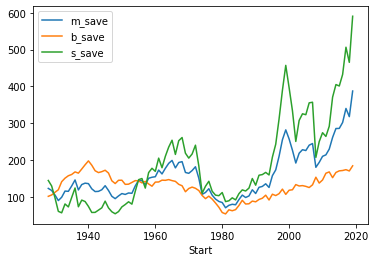

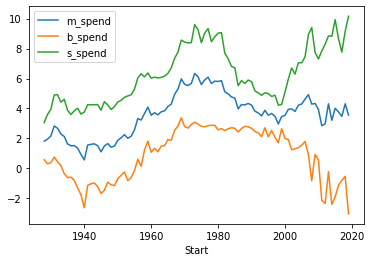

In [3]:
columns = lambda name: [letter+'_'+name for letter in 'mbs']
spend[columns('save')].plot()
spend[columns('spend')].plot()

# Plot Saving and Spending Together

<ipython-input-4-9670884fbb3e>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


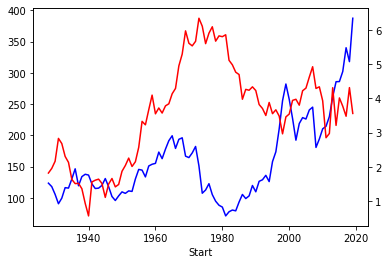

In [4]:
letter = 'm'
fig, ax1 = plt.subplots()
spend[letter+'_save'].plot(ax=ax1, style = 'b-')
ax2 = ax1.twinx()
spend[letter+'_spend'].plot(ax=ax2, style = 'r-')
fig.show()